In [1]:
# ! pip install tabpfn #pip install "tabpfn @ git+https://github.com/PriorLabs/TabPFN.git"

# Setting Up Data Science Environment for Classification

This code sets up a Python environment for a classification task, specifically preparing to work with the breast cancer dataset. Here's what each import provides:


### Machine Learning Framework
- `load_breast_cancer`: A function to load the breast cancer Wisconsin dataset, a common benchmark for binary classification
  - Features are computed from a digitized image of a fine needle aspirate of a breast mass
  - The dataset includes 569 samples with 30 features
  - The target variable indicates whether a tumor is malignant or benign

- `accuracy_score` and `roc_auc_score`: Metrics for evaluating classification models
  - Accuracy: The proportion of correct predictions
  - ROC-AUC: Area under the Receiver Operating Characteristic curve, measuring the model's ability to discriminate between classes

- `train_test_split`: A function to split datasets into random train and test subsets for model validation

This code prepares the environment for building and evaluating a classification model, likely using TabPFN (based on your previous pip install) as the modeling approach.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix, 
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve, 
    roc_auc_score
)
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset

In [3]:

X, y = load_breast_cancer(return_X_y=True)



# Get the feature names and target names

In [4]:

cancer = load_breast_cancer()
feature_names = cancer.feature_names
target_names = cancer.target_names


print(feature_names)
print(target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


# Create a DataFrame for easier exploration

In [5]:

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = [target_names[val] for val in y]

df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


# Basic dataset information

In [6]:

print("Dataset Shape:", X.shape)
print("Number of Features:", X.shape[1])
print("Number of Samples:", X.shape[0])
print("\nClass Distribution:")
print(df['diagnosis'].value_counts())
print("\nClass Distribution (%):")
print(df['diagnosis'].value_counts(normalize=True).round(3) * 100)


Dataset Shape: (569, 30)
Number of Features: 30
Number of Samples: 569

Class Distribution:
diagnosis
benign       357
malignant    212
Name: count, dtype: int64

Class Distribution (%):
diagnosis
benign       62.7
malignant    37.3
Name: proportion, dtype: float64


In [7]:
# Display first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Statistical summary of features
print("\nStatistical Summary of Features:")
print(df.describe().T)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sum())




First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  w

# Visualize the correlation matrix

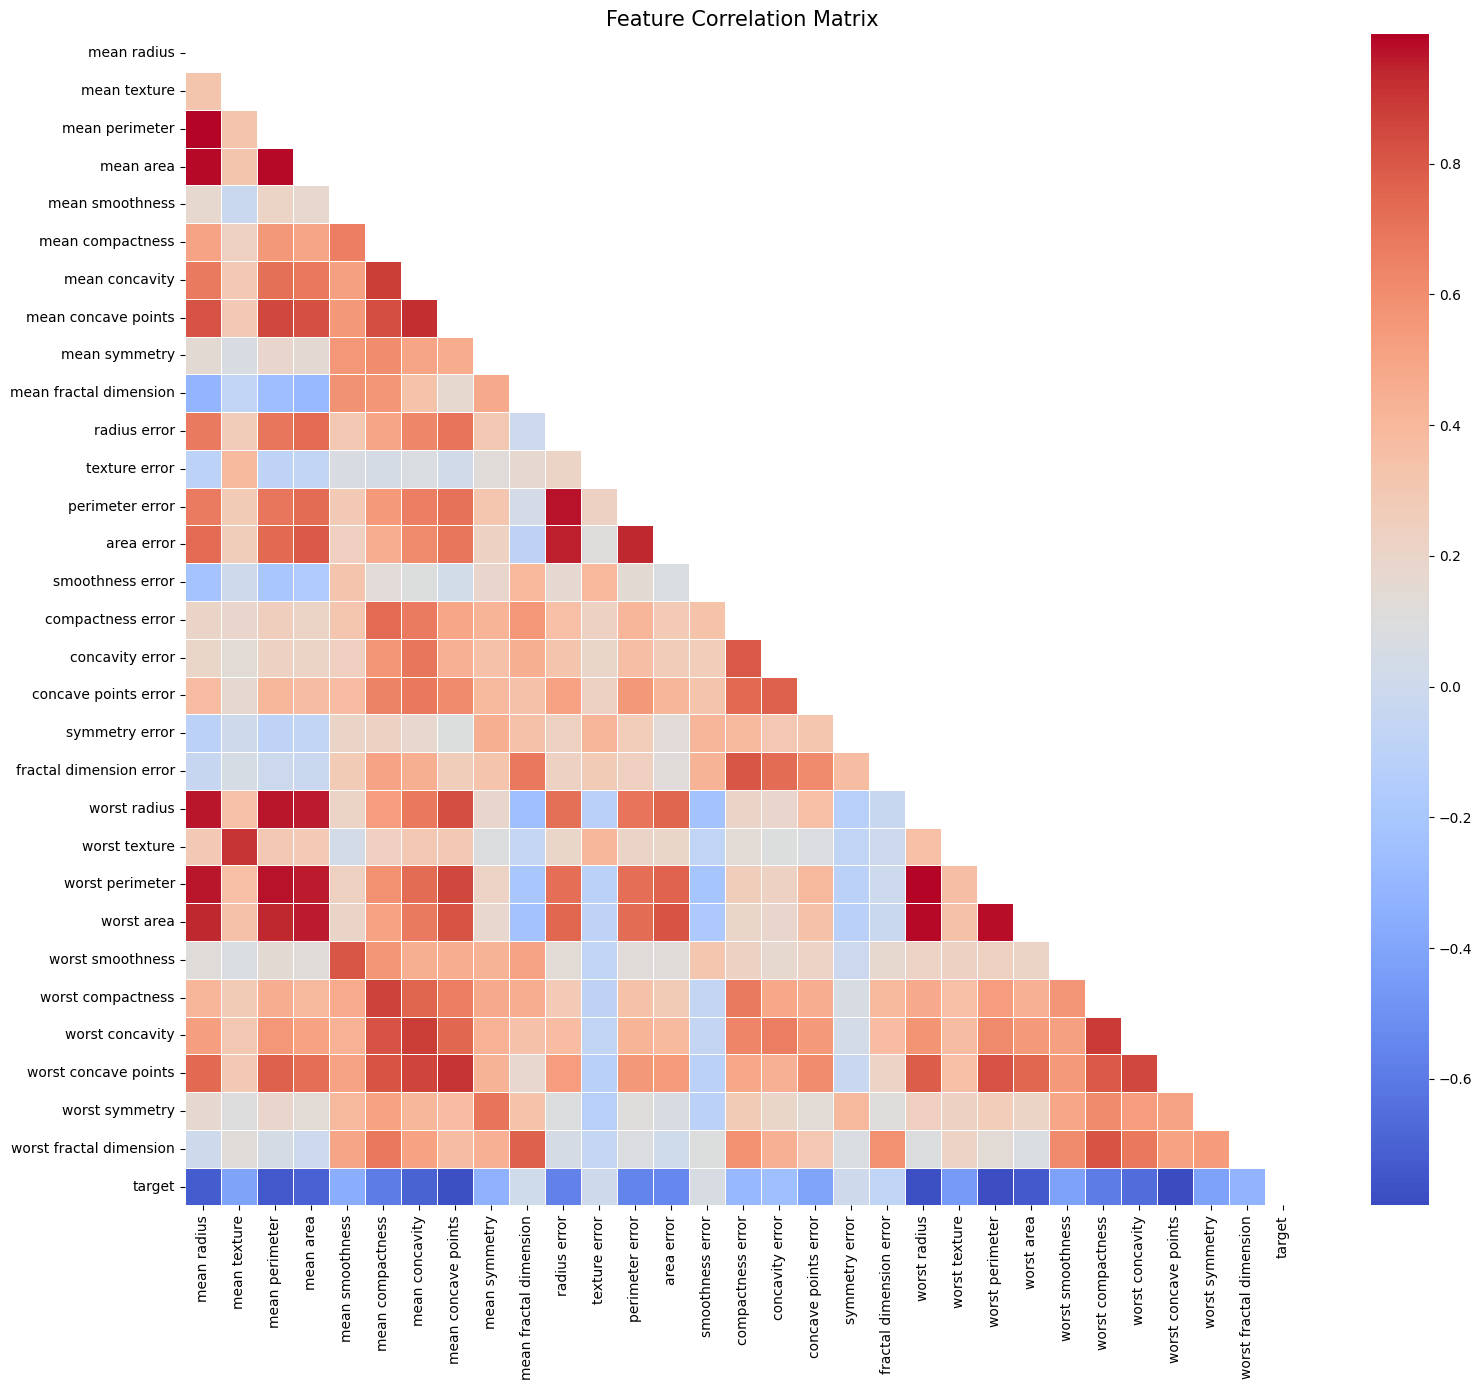

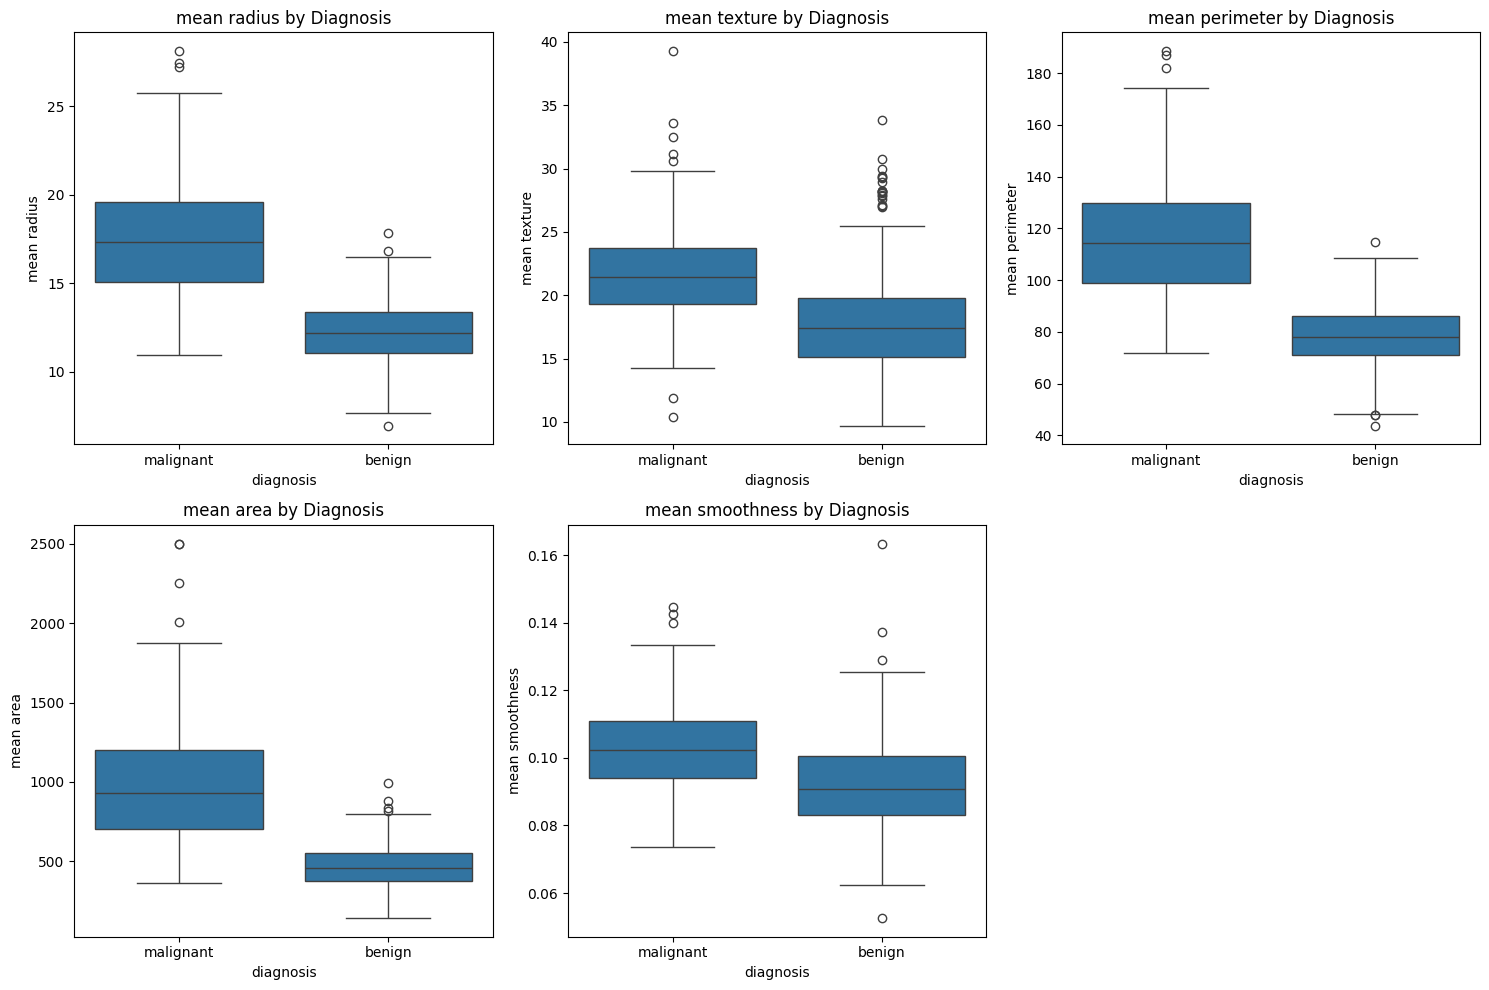

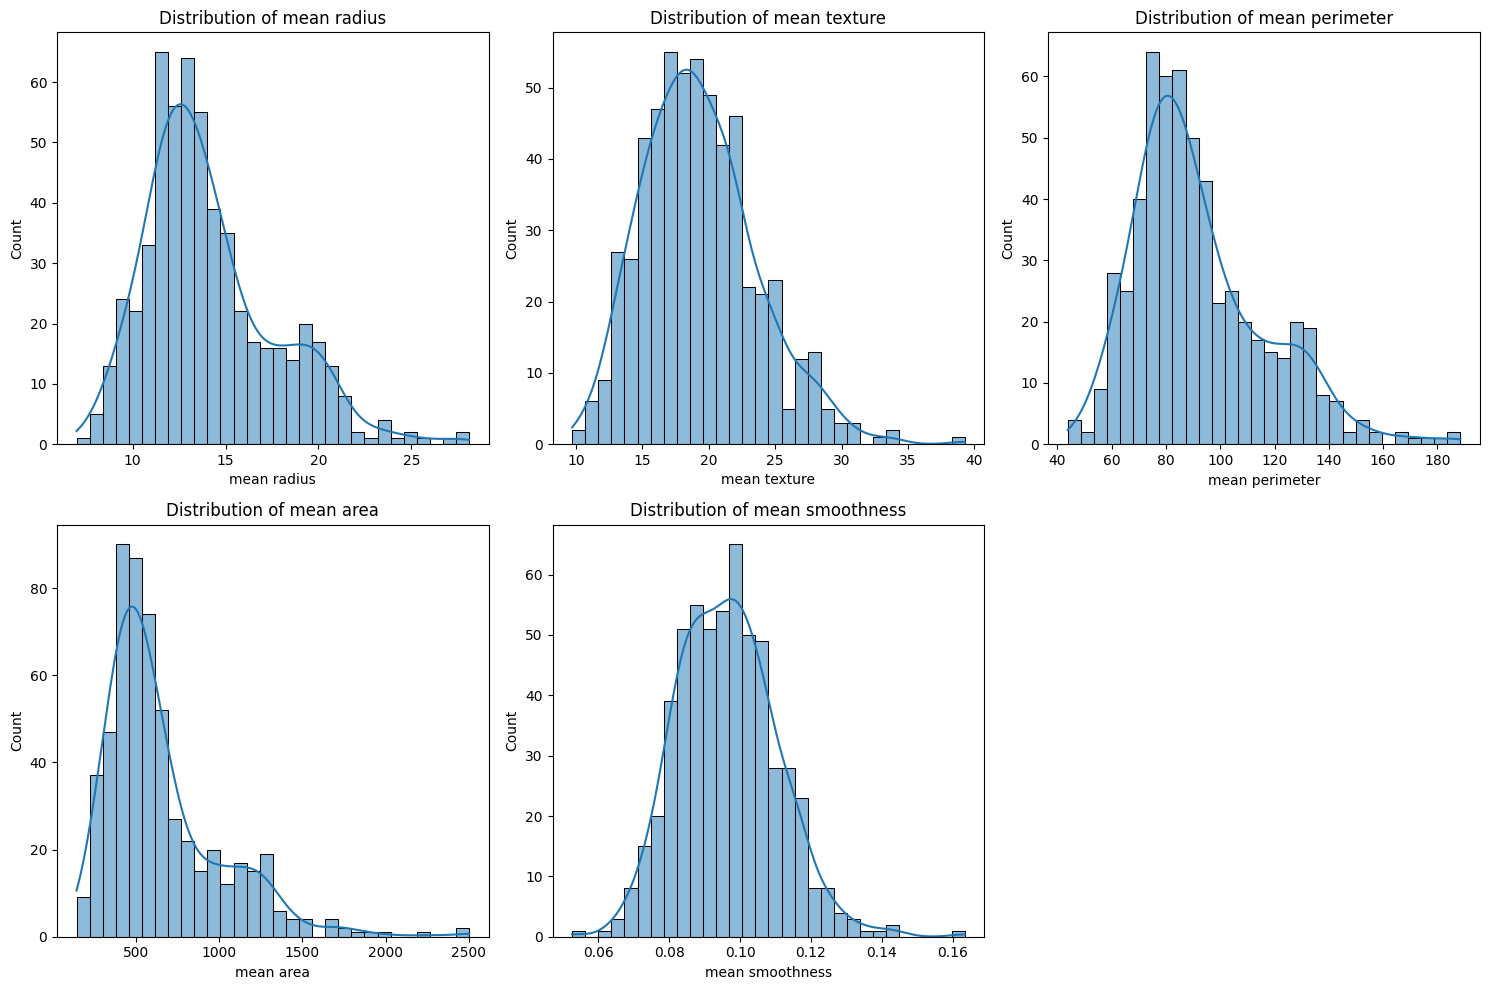

In [8]:

plt.figure(figsize=(16, 14))
correlation_matrix = df.drop('diagnosis', axis=1).corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=15)
plt.tight_layout()
plt.show()

# Boxplots for comparing feature distributions between classes
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names[:5]):  # Just the first 5 features for clarity
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'{feature} by Diagnosis')
plt.tight_layout()
plt.show()

# Distribution of a few key features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names[:5]):  # Just the first 5 features
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


# Boxplots for comparing feature distributions between classes

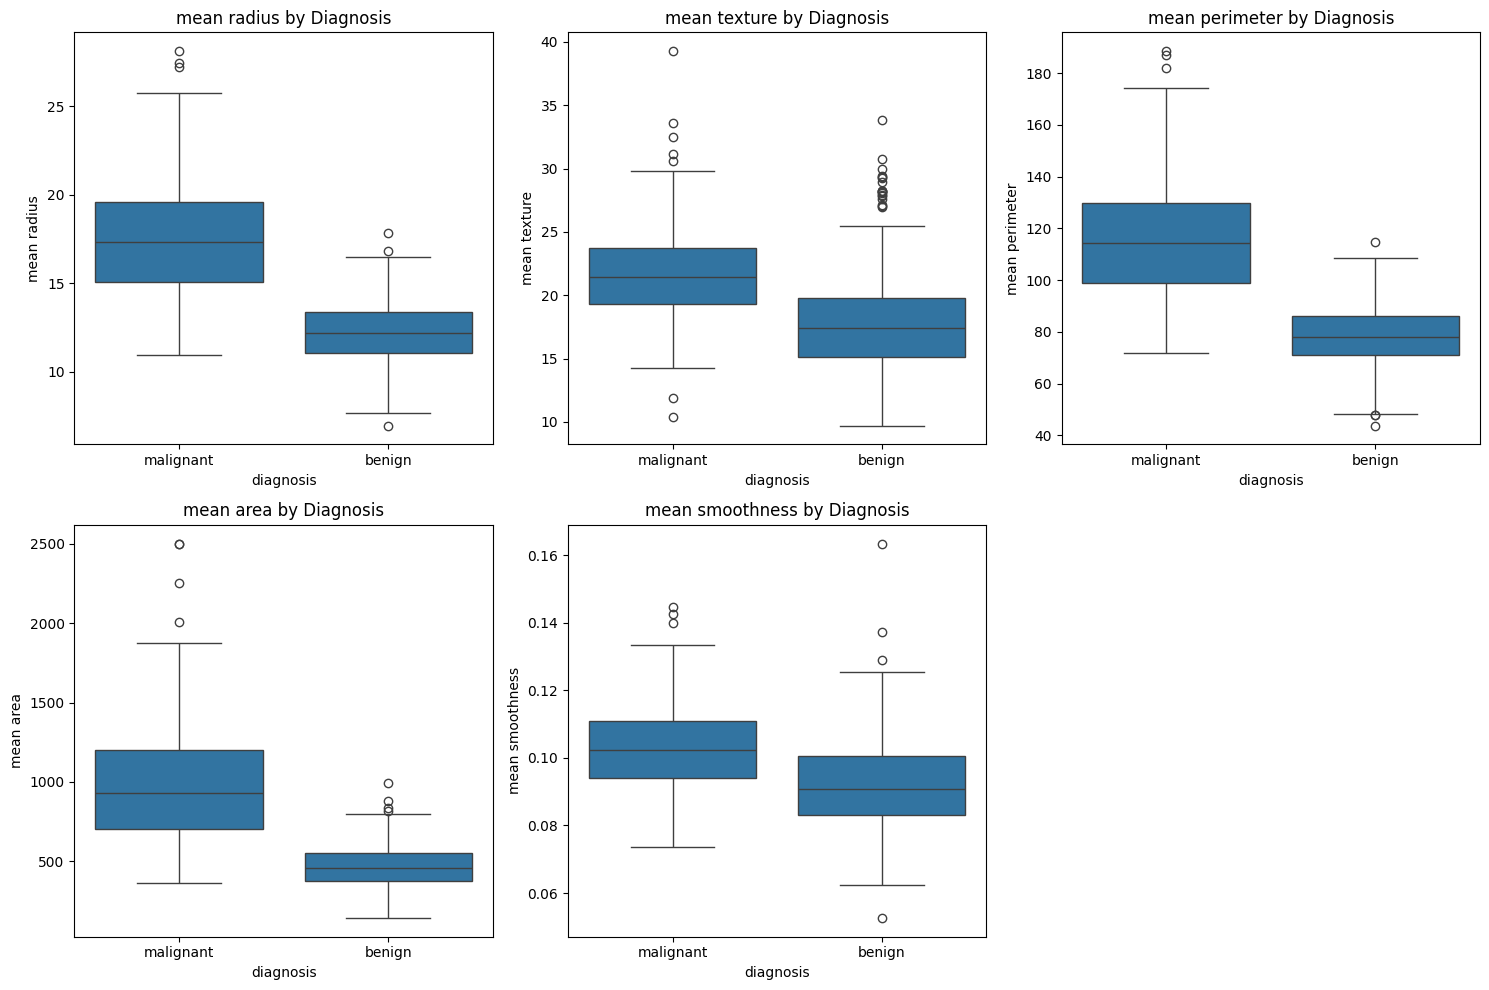

In [9]:

plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names[:5]):  # Just the first 5 features for clarity
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'{feature} by Diagnosis')
plt.tight_layout()
plt.show()



# Distribution of a few key features

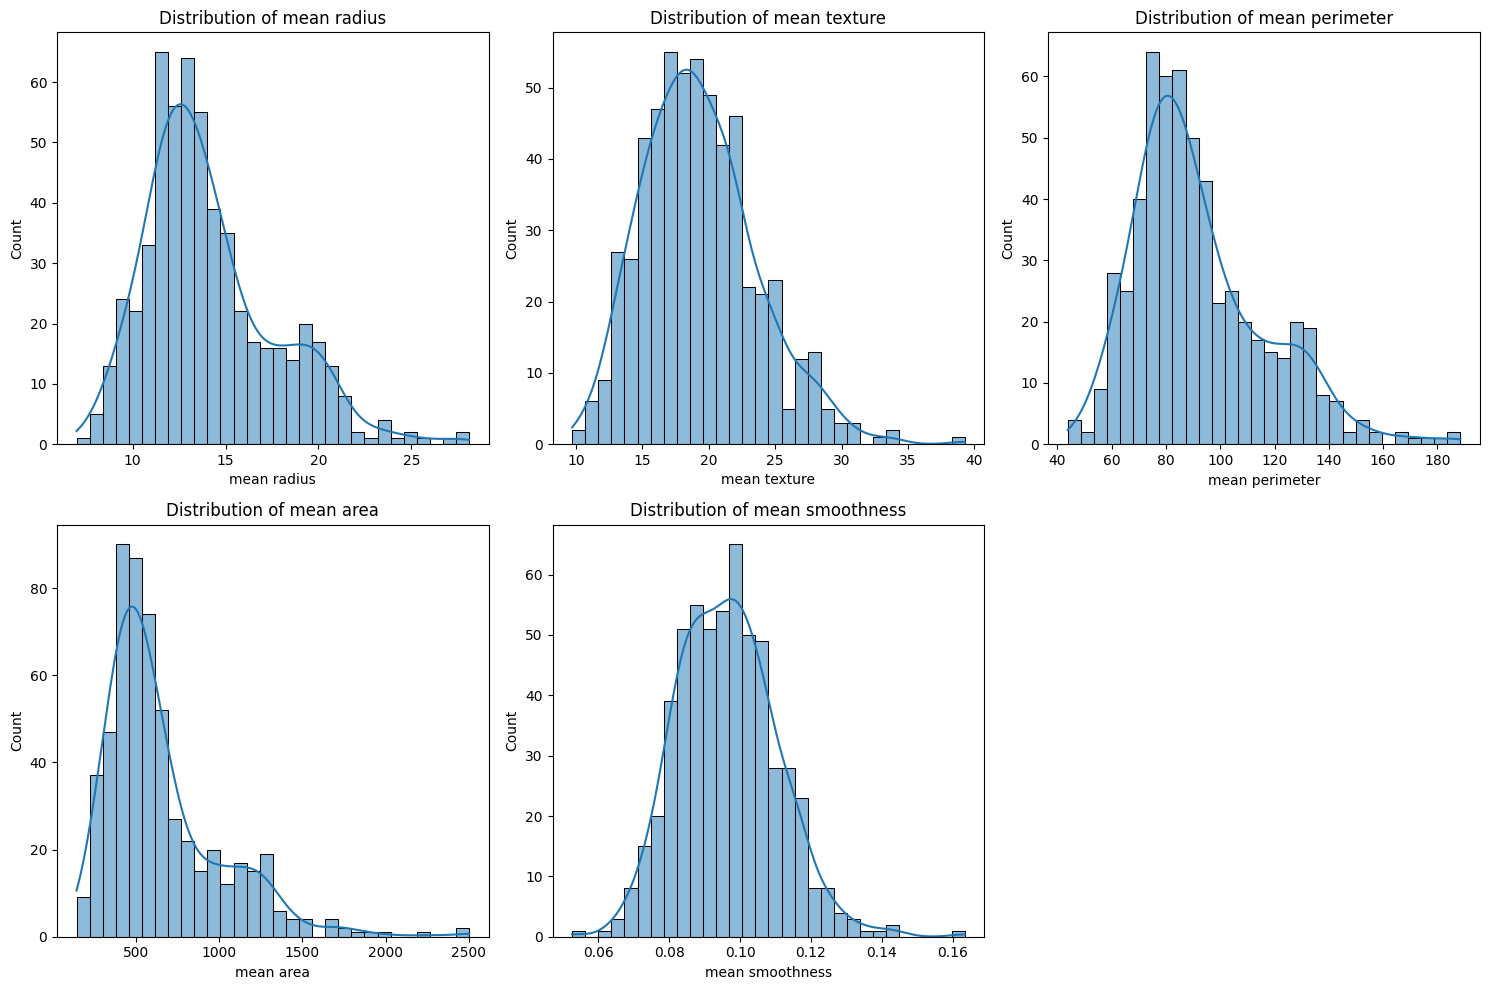

In [10]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names[:5]):  # Just the first 5 features
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


# Using TabPFN for Breast Cancer Classification

This code imports the TabPFN classifier and loads the breast cancer dataset for a classification task:

### TabPFN Import
- `TabPFNClassifier`: A specialized classifier from the TabPFN library that uses Prior-Data Fitted Networks
  - TabPFN is designed specifically for tabular data
  - It leverages transformer-based architectures pre-trained on synthetic tabular datasets
  - The model requires minimal hyperparameter tuning and often performs well out-of-the-box

### Dataset Loading
- `load_breast_cancer(return_X_y=True)`: Loads the breast cancer Wisconsin dataset as NumPy arrays
  - `X`: Features matrix with 569 samples and 30 features (measurements from digitized images)
  - `y`: Target vector with binary values indicating benign (0) or malignant (1) tumors
  - The `return_X_y=True` parameter specifies that the function should return the data and target as separate arrays rather than as a Bunch object

This setup forms the foundation for applying the TabPFN classifier to predict breast cancer diagnoses based on the provided features. TabPFN is particularly well-suited for this type of tabular classification task with a moderate number of features.

In [11]:
from tabpfn import TabPFNClassifier

# Load data
X, y = load_breast_cancer(return_X_y=True)


# Splitting Data for Classification Model Evaluation


This code divides the breast cancer dataset into training and testing sets using scikit-learn's `train_test_split` function:

### Parameters Explained:
- `X`: The feature matrix containing 30 features for each sample
- `y`: The target vector with binary classification labels (0 for benign, 1 for malignant)
- `test_size=0.5`: Allocates 50% of the data for testing and 50% for training
  - This is a larger test set than the typical 20-30%, which might be chosen to better evaluate model performance
- `random_state=42`: Sets a specific random seed for reproducibility
  - Using a fixed random state ensures that the split will be the same each time the code runs
  - The value 42 is commonly used as a default in data science (a reference to "The Hitchhiker's Guide to the Galaxy")

### Result:
- `X_train`: Features for training the model (569 × 0.5 = ~284 samples)
- `X_test`: Features for evaluating the model (~284 samples)
- `y_train`: Target labels for the training set
- `y_test`: Target labels for the test set

This even split allows for robust evaluation of the TabPFN classifier's performance on unseen data.

In [12]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)



len(y_test)



285

# Training the TabPFN Classifier

This code initializes and trains a TabPFN classifier on the breast cancer dataset:

### Model Initialization
- `TabPFNClassifier()`: Creates an instance of the TabPFN classifier with default parameters
  - TabPFN is a "Prior-Data Fitted Network" specifically designed for tabular data
  - Unlike traditional ML models, TabPFN comes pre-trained on synthetic tabular data
  - The default settings typically work well without extensive hyperparameter tuning

### Model Training
- `clf.fit(X_train, y_train)`: Trains the classifier on the training data
  - `X_train`: Feature matrix with ~284 samples and 30 features
  - `y_train`: Target vector with binary labels (benign/malignant)
  - TabPFN's training process is generally faster than traditional ML models as it leverages transfer learning
  - The model adapts its pre-trained knowledge to the specific patterns in the breast cancer dataset

TabPFN typically requires less data for effective training compared to models that start from scratch, making it well-suited for medical datasets like this one where labeled data might be limited.

In [13]:
# Initialize a classifier
clf = TabPFNClassifier()
clf.fit(X_train, y_train)



/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


,n_estimators,4
,categorical_features_indices,None
,softmax_temperature,0.9
,balance_probabilities,False
,average_before_softmax,False
,model_path,'auto'
,device,'auto'
,ignore_pretraining_limits,False
,inference_precision,'auto'
,fit_mode,'fit_preprocessors'
,memory_saving_mode,'auto'


# Making Predictions and Evaluating Performance

This code evaluates the TabPFN classifier by generating predictions and calculating the ROC AUC score:

### Prediction Generation
- `clf.predict_proba(X_test)`: Generates probability predictions for each class
  - Returns a 2D array of shape (n_samples, n_classes) = (~284 samples, 2 classes)
  - Each row represents one test sample
  - Each column represents the probability of belonging to a class (0 or 1)

### Performance Evaluation
- `prediction_probabilities[:, 1]`: Extracts only the probabilities for the positive class (malignant)
  - The second column (index 1) contains probabilities for the positive class

- `roc_auc_score(y_test, prediction_probabilities[:, 1])`: Calculates the ROC AUC metric
  - ROC (Receiver Operating Characteristic) curve plots the true positive rate against the false positive rate
  - AUC (Area Under Curve) measures the classifier's ability to distinguish between classes
  - Values range from 0 to 1, where:
    - 1.0 represents a perfect classifier
    - 0.5 represents a random classifier
    - Values above 0.8 are generally considered good
    - Values above 0.9 are considered excellent

This evaluation helps assess how well the TabPFN model distinguishes between benign and malignant tumors based on the provided features, which is crucial for medical diagnostic applications.

In [14]:
# Predict probabilities
prediction_probabilities = clf.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))



/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ROC AUC: 0.9981992797118848


# Predicting Class Labels and Evaluating Accuracy


This code produces class predictions and evaluates the model's accuracy:

### Prediction Generation
- `clf.predict(X_test)`: Generates class label predictions for the test data
  - Unlike `predict_proba()` which returns probabilities, this method returns the actual predicted class labels
  - Returns a 1D array of shape (n_samples,) with values 0 (benign) or 1 (malignant)
  - Internally, the model assigns the class with the highest probability to each sample

### Performance Evaluation
- `accuracy_score(y_test, predictions)`: Calculates the proportion of correct predictions
  - Compares the predicted labels (`predictions`) with the true labels (`y_test`)
  - Returns a value between 0 and 1, where:
    - 1.0 means all predictions are correct
    - 0.0 means all predictions are incorrect
  - Formula: (Number of correct predictions) / (Total number of predictions)

Accuracy is a straightforward metric for classification tasks, representing the percentage of samples correctly classified. For breast cancer diagnosis, high accuracy is important, but the ROC AUC score (calculated in the previous step) provides additional insight into the model's ability to distinguish between the classes, which is particularly valuable in medical contexts where false negatives can have serious consequences.

In [15]:
# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

Accuracy 0.9824561403508771


In [16]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [17]:
print(predictions)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1]


# Confusion Matrix

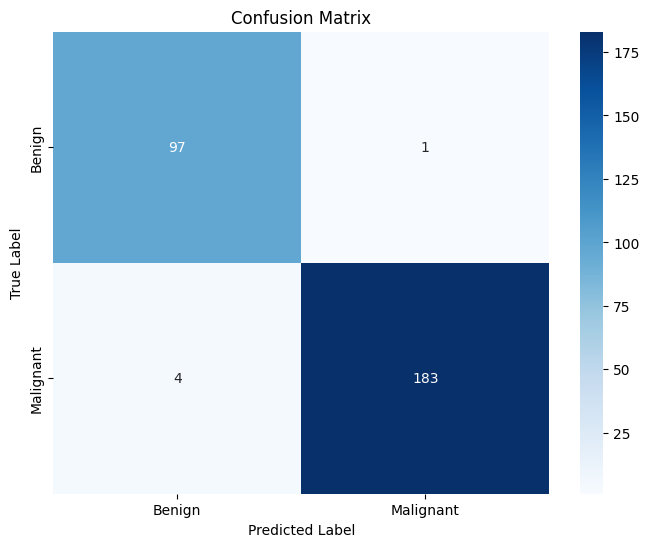

In [18]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 3. Classification Report, Individual Metrics and RoC Curve


Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        98
   Malignant       0.99      0.98      0.99       187

    accuracy                           0.98       285
   macro avg       0.98      0.98      0.98       285
weighted avg       0.98      0.98      0.98       285


Key Metrics:
Accuracy:  0.9825
Precision: 0.9946
Recall:    0.9786
F1 Score:  0.9865
ROC AUC:   0.9982


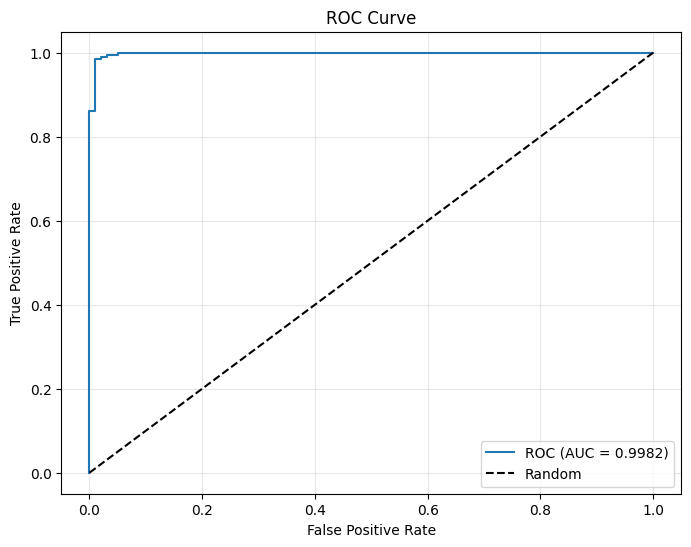

In [19]:
print("\nClassification Report:")
print(classification_report(y_test, predictions, 
                           target_names=['Benign', 'Malignant']))


print("\nKey Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, predictions):.4f}")
print(f"Precision: {precision_score(y_test, predictions):.4f}")
print(f"Recall:    {recall_score(y_test, predictions):.4f}")
print(f"F1 Score:  {f1_score(y_test, predictions):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, prediction_probabilities[:, 1]):.4f}")


fpr, tpr, _ = roc_curve(y_test, prediction_probabilities[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc_score(y_test, prediction_probabilities[:, 1]):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Installing and Using AutoTabPFN

This code enhances the TabPFN implementation with automatic hyperparameter optimization:

### Package Installation
- `hyperopt`: A Python library for serial and parallel optimization over awkward search spaces
- `tabpfn-extensions`: Extended functionality for TabPFN, including automated optimization tools
- The commented portion shows how you could alternatively clone the repository directly

### AutoTabPFN Setup
- `AutoTabPFNClassifier`: An enhanced version of TabPFN that performs automatic tuning and ensemble creation
  - Combines multiple TabPFN models with optimized configurations
  - Uses Bayesian optimization via hyperopt to find optimal hyperparameters

### Configuration Parameters
- `max_time=120`: Limits the tuning process to 120 seconds (2 minutes)
  - The optimizer will try to find the best configuration within this time constraint
  - Longer times generally lead to better results but with diminishing returns
- `device="cpu"`: Specifies that computations should run on the CPU
  - Alternative would be "cuda" for GPU acceleration if available

### Training Process
- `clf.fit(X_train, y_train)`: Trains the optimized ensemble model
  - During this process, AutoTabPFN will:
    1. Try different TabPFN configurations
    2. Evaluate their performance
    3. Select the best performing models
    4. Create an ensemble of these models

AutoTabPFN typically provides better performance than the base TabPFN model by leveraging ensemble techniques and hyperparameter optimization, though at the cost of longer training times.

In [20]:
! pip install hyperopt tabpfn-extensions #git clone https://github.com/priorlabs/tabpfn-extensions.git

from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier

clf = AutoTabPFNClassifier(max_time=120, device="cpu") # 120 seconds tuning time # cuda for gpu
clf.fit(X_train, y_train)



  Obtaining dependency information for hyperopt from https://files.pythonhosted.org/packages/b6/cd/5b3334d39276067f54618ce0d0b48ed69d91352fbf137468c7095170d0e5/hyperopt-0.2.7-py2.py3-none-any.whl.metadata
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl.metadata (1.7 kB)
  Obtaining dependency information for tabpfn-extensions from https://files.pythonhosted.org/packages/35/d9/1eded2957d3d91651068b4e8fe12da724e22f695766da02d7932c9f637cf/tabpfn_extensions-0.0.4-py3-none-any.whl.metadata
  Using cached tabpfn_extensions-0.0.4-py3-none-any.whl.metadata (18 kB)
  Obtaining dependency information for future from https://files.pythonhosted.org/packages/da/71/ae30dadffc90b9006d77af76b393cb9dfbfc9629f339fc1574a1c52e6806/future-1.0.0-py3-none-any.whl.metadata
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
  Obtaining dependency information for cloudpickle from https://files.pythonhosted.org/packages/7e/e8/64c37fadfc2816a7701fa8a6ed8d87327c7d54eacfbfb6edab14a2f2be75/cloudpickle

2025-06-28 18:42:04 INFO     Using `default` preset for Post Hoc Ensemble.
2025-06-28 18:42:04 INFO     No categorical_feature_indices given. Assuming no categorical features.
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-06-28 18:42:04 INFO     Using task type: TaskType.BINARY
2025-06-28 18:42:04 INFO     Obtaining TabPFN models from a random portfolio.
2025-06-28 18:42:09 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'rand

,max_time,120
,preset,'default'
,ges_scoring_string,'roc'
,device,'cpu'
,random_state,None
,categorical_feature_indices,None
,ignore_pretraining_limits,False
,phe_init_args,None


In [21]:
predictions = clf.predict(X_test)
print(predictions)

/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider us

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1]


In [22]:
print("Accuracy", accuracy_score(y_test, predictions))

Accuracy 0.9824561403508771


# Saving and Loading the TabPFN Model

Here's the code to save your trained TabPFN model and then load it back:


1. **Saving the Model**:
   - Uses Python's `pickle` module to serialize the model object
   - The `'wb'` flag opens the file in binary write mode
   - All model parameters and state are preserved in the file

2. **Loading the Model**:
   - Uses `pickle.load()` to deserialize the model from the file
   - The `'rb'` flag opens the file in binary read mode
   - The loaded model is stored in `loaded_clf`

3. **Important Considerations**:
   - Make sure the same version of TabPFN is used when loading the model
   - The pickle format is Python-specific and not cross-language compatible
   - For larger models, consider using joblib instead of pickle for better handling of large NumPy arrays

This approach works well for TabPFN models and allows you to reuse your trained model without having to retrain it each time.

In [23]:
import pickle
import os

# After training your model with clf.fit(X_train, y_train)

# 1. Save the trained model to a file
model_filename = 'tabpfn_breast_cancer_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)
print(f"Model saved to {model_filename}")

# 2. Later, to load the model from the file
if os.path.exists(model_filename):
    with open(model_filename, 'rb') as file:
        loaded_clf = pickle.load(file)
    print(f"Model loaded from {model_filename}")
    
    # Verify the loaded model works correctly
    test_predictions = loaded_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Loaded model accuracy: {test_accuracy:.4f}")
else:
    print(f"Model file {model_filename} not found")

Model saved to tabpfn_breast_cancer_model.pkl
Model loaded from tabpfn_breast_cancer_model.pkl


/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider us

Loaded model accuracy: 0.9825


1. **Loads the saved model** using pickle
2. **Handles both single and multiple samples** by checking the input shape
3. **Returns a dictionary with comprehensive prediction information**:
   - Class labels (0/1)
   - Full probability matrix for all classes
   - Probability for the positive class only (simplified access)
4. **Includes error handling** for common issues like missing files or data format problems
5. **Provides example usage** for both single and batch prediction scenarios

You can easily incorporate this function into any application that needs to use your trained TabPFN model for breast cancer prediction.

In [24]:
def predict_with_tabpfn(input_data, model_path='tabpfn_breast_cancer_model.pkl'):
   """
   Load a saved TabPFN model and make predictions for given input data.
   
   Parameters:
   -----------
   input_data : array-like
       Input features for prediction, shape should match training data.
       Can be a single sample (1D array) or multiple samples (2D array).
   model_path : str, default='tabpfn_breast_cancer_model.pkl'
       Path to the saved model file.
   
   Returns:
   --------
   dict: A dictionary containing:
       - 'predictions': Class labels (0/1)
       - 'probabilities': Probability estimates for each class
       - 'positive_proba': Probability of the positive class (class 1)
   
   Raises:
   -------
   FileNotFoundError: If the model file doesn't exist
   ValueError: If there's an issue with the input data format
   """
   import pickle
   import numpy as np
   import os
   
   # Check if model file exists
   if not os.path.exists(model_path):
       raise FileNotFoundError(f"Model file not found: {model_path}")
   
   # Load the model
   try:
       with open(model_path, 'rb') as file:
           model = pickle.load(file)
       print(f"Model successfully loaded from {model_path}")
   except Exception as e:
       raise Exception(f"Error loading model: {str(e)}")
   
   # Ensure input is in the right format
   input_data = np.asarray(input_data)
   if input_data.ndim == 1:
       # Single sample - reshape to 2D array
       input_data = input_data.reshape(1, -1)
   
   # Make predictions
   try:
       predictions = model.predict(input_data)
       probabilities = model.predict_proba(input_data)
       positive_class_proba = probabilities[:, 1]  # Probability of class 1 (usually positive class)
       
       return {
           'predictions': predictions,
           'probabilities': probabilities,
           'positive_proba': positive_class_proba
       }
   except Exception as e:
       raise ValueError(f"Error during prediction: {str(e)}")


# Example usage:
if __name__ == "__main__":
   # Example for a single sample
   # Replace with your actual test data
   sample = X_test[0]  # Single test instance
   
   result = predict_with_tabpfn(sample)
   print(f"Prediction: {'Malignant' if result['predictions'][0] == 1 else 'Benign'}")
   print(f"Confidence: {result['positive_proba'][0]:.4f}")
   
   # Example for multiple samples
   samples = X_test[:5]  # First 5 test instances
   
   batch_result = predict_with_tabpfn(samples)
   for i, (pred, prob) in enumerate(zip(batch_result['predictions'], batch_result['positive_proba'])):
       print(f"Sample {i+1}: {'Malignant' if pred == 1 else 'Benign'} (Confidence: {prob:.4f})")

Model successfully loaded from tabpfn_breast_cancer_model.pkl


/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider us

Prediction: Malignant
Confidence: 0.9250
Model successfully loaded from tabpfn_breast_cancer_model.pkl


/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(
/Users/raamraam/outskill/GenAIEngineering-Cohort2/Week1/week1_env/lib/python3.11/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider us

Sample 1: Malignant (Confidence: 0.9250)
Sample 2: Benign (Confidence: 0.0000)
Sample 3: Benign (Confidence: 0.0007)
Sample 4: Malignant (Confidence: 0.9999)
Sample 5: Malignant (Confidence: 1.0000)
